# <center>Milestone 2</center> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

## 1. Data Loading

In [2]:
# Paths

DATA_PATH = "data/"


# Specific paths for all datasets

MOVIES_FOLDER = DATA_PATH + "MovieSummaries/"
MOVIES_DATASET = MOVIES_FOLDER + "movie.metadata.tsv"
CHARACTERS_DATASET = MOVIES_FOLDER + "character.metadata.tsv"
CHARACTERS_NAMES_DATASET = MOVIES_FOLDER + "name.clusters.txt"
CHARACTERS_TYPES_DATASET = MOVIES_FOLDER + "tvtropes.clusters.txt"
PLOTS_DATASET = MOVIES_FOLDER + "plot_summaries.txt"

In [3]:
# Load movies metadata

movies = pd.read_csv(MOVIES_DATASET, sep='\t', names=['id_wiki','id_freebase','name','date',
                                                      'box_office','runtime','lang','country','genre'])
movies.head()

,id_wiki,id_freebase,name,date,box_office,runtime,lang,country,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
# Load characters metadata

characters = pd.read_csv(CHARACTERS_DATASET, sep='\t', names=['id_wiki_movie', 'id_freebase_movie', 'movie_release_date', 'character_name',
                                                      'actor_birth_date','actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name',
                                                      'actor_age_movie_release', 'character_actor_freebase_map_id', 'character_id_freebase',
                                                      'actor_id_freebase'])
characters.head()

,id_wiki_movie,id_freebase_movie,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_movie_release,character_actor_freebase_map_id,character_id_freebase,actor_id_freebase
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
# Load characters' names metadata

characters_names = pd.read_csv(CHARACTERS_NAMES_DATASET, sep='\t', names=['character_name', 'character_actor_freebase_map_id'])

characters_names.head()

,character_name,character_actor_freebase_map_id
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [6]:
# Load characters' types metadata

characters_types = pd.read_csv(CHARACTERS_TYPES_DATASET, sep='\t', names=['character_type', 'character_actor_freebase_map_id'])

characters_types.head()

,character_type,character_actor_freebase_map_id
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [7]:
# Load plot summaries' metadata

plot_summaries = pd.read_csv(PLOTS_DATASET, sep='\t', names=['id_wiki_movie', 'summary'])

plot_summaries.head()

,id_wiki_movie,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


## 2. General statistics about the dataset

2.1) How many years are covered by this dataset?

In [8]:
movies_df = movies.copy()

# I decided to replace the dates in the dataset copy by the years only, since we don't need the month and the year
# one weird value at index 62836, date is 1010-12-02 --> could not be converted to datetime so replaced by NaT
movies_df['date'] = pd.to_datetime(movies_df['date'], errors = 'coerce', format = 'mixed').dt.year

print("Movie release years range: ", movies_df['date'].min(), "-", movies_df['date'].max())

Movie release years range:  1888.0 - 2016.0


2.2) What is the total number of movies we have? 
/ Histogram - How many movies do we have per year? 

In [9]:
print("The total number of movies is :", movies_df.shape[0])

The total number of movies is : 81741


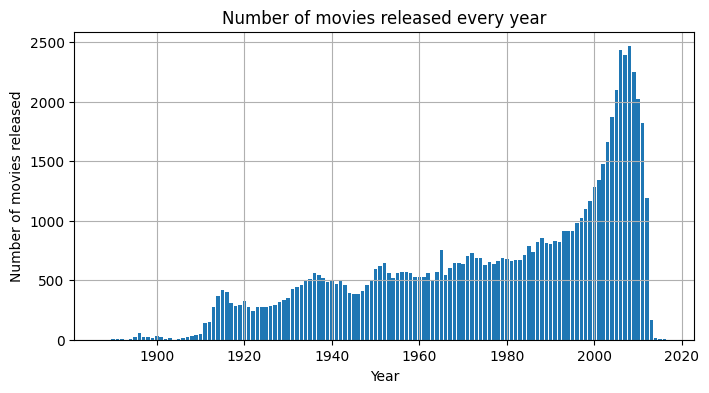

In [10]:
# calculating the number of movies per year
movies_per_year = movies_df['date'].value_counts()

plt.figure(figsize = (8, 4))
plt.bar(movies_per_year.index, movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.title('Number of movies released every year')
plt.grid(True)
plt.show()

2.3) What are the 20 genres that are the most represented and what is the corresponding count of movies with this genre? (List of all genres existing in general added)

In [12]:
# genres are given as dictionaries in the form of strings --> dictionary has to be extracted from the string
# I decided to convert the dictionary to a list, keeping only the genre names (not the genre id), to make data handling easier
movies_df['genre'] = movies_df['genre'].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')

In [13]:
# find the most common genres

# making one big list with all instances of all genre (joining the genres lists for all movies)
genres_list = []
for genres in movies_df['genre'] : genres_list += genres

# transforming the list into a dataframe in order to use value_counts()
genres_df = pd.Series(genres_list)

# number of instances for each genre
instances_per_genre = genres_df.value_counts()

# top 20 genres with number of instances
top_20_genres = instances_per_genre[:20]

print('Top 20 most common genres, with number of movies')
top_20_genres


# TO DO : WHAT IS THE GENRE 'N'??? (see list below)

Top 20 most common genres, with number of movies


Drama               34007
Comedy              16349
Romance Film        10234
Black-and-white      9094
Action               8798
Thriller             8744
Short Film           8141
World cinema         7155
Crime Fiction        6948
Indie                6897
Documentary          5630
Horror               5280
Silent film          5250
Adventure            4963
Family Film          4598
N                    4588
Action/Adventure     4561
Comedy film          4362
Musical              4160
Animation            3534
Name: count, dtype: int64

2.4) How many countries are represented? and in what poportion(histogram?)?

2.5) How many different languages are totally represented in movies?

2.6) What are the different ethnicities represented in the dataset?

2.7) Movies from what countries are included in the dataset?

## 3. Test for feasability of our idea

3.1) We may want to define different regions of the world, grouping different countries together. We could define the following regions: 
- Europe 
- USA + Canada + Australia
- Middle East
- Asia
- Africa
- South & Central America

--> Check how many movies are contained for each subdivision over time? Do we have enough movies for each division at each timepoint to be able to draw relevant conclusions?
(Here we don't only check if our partitioning is adequate but also the general timespan we can perform our analysis on: WWI may be too early)

3.2) We will need to get a general idea about the number of NANs contained in our dataset, specifically for the characteristics that are important for us. These contain the following:
- Actor DOB 
- Actor Gender
- Actor Height 
- Actor Ethnicity
- Actor Age at movie release
- Movie Release Date
- Movie Box Office Revenue
- Movie Languages
- Movie Countries
- Movie Genres
- Do all movies have a plot summary?

--> Analysis of NANs and evaluation if we still have enough movie sets to analyse, should we have to cross those containing important NANs out. Evaluate if we should eliminate movie from whole analysis, as soon as it does not contain one of the important characteristics or if we should only remove it for the specific analysis this characteristic is used for.

3.3) Do we actually manage to create a word cloud with the most commonly used words in plot summaries? What algotithm can we use for this? How can we exclude words such as "and" & "if"? Perform example analysis on years 1950-1955.

3.4) How are we able to extract the "villain" and the "main character" from a movie plot? How can we get their typical characteristics? Can we test the principle of this for a specific movie?

## 4. Data Pre-Processing

--> Data Cleaning (remove Nans and invalid values), merging data if neccessary.

## 5. "Films as a mirror of society" general overview

5.1) plot genre of movies against time and against country groups

5.2) plot movie box revenues of regions against time. How do we want to take the effect of inflation into account?

5.3) plot average number of languages spoken in movies against time for each region.

5.4) plot percentage of women in movies over time in different regions. How does this plot change when looking at percentage of female main characters?

5.5) Plot average age actors over the years and in different regions at movie release date. How does this change if we separate age data based on gender?

5.6) Plot average # of ethnicites of characters represented in movies over years in different regions. Does this change when looking at the main character?

... Elaborate on further questions mentioned in the readme.

## 6. Diving into diverse societal events

6.1) Creation of a "word cloud" for each historical event. What are the most common words used in a plot summary?

6.2) Find the typical main character and the typical villain of each era. What adjectives describe them. Find the "most representative main character/villain" for each era. 

--> It might be a good idea to represent the specific interesting findings that we found in the "general overview" in the relative time period it was found in. (e.g. higher representation of LGBTQ+ characters may be mentioned in the corresponding era it was found in). Does not really make a lot of sense to mention in the WWII era that we *did not* find a high LGBTQ+ representation (unless of course we surprisingly find one). 